# P2 - Team Jarlsberg
### Zachary Noel
### Siddhesh Mahadeshwar
### Erin Dolson

In [45]:
import scipy.spatial.distance as dist
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sp
import scipy.stats as stats
import math
import plotly.express as px
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial import minkowski_distance
from scipy.spatial.distance import cityblock
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
from gapstat import GapStatClustering
from scipy.cluster import hierarchy
from sklearn.datasets import load_iris
from sklearn import preprocessing
%matplotlib inline

# Part B

## Problem 4

Min-max normalization with min = 0 and max = 1

In [46]:
# Normalize between (0,1)
df = pd.DataFrame([20, 30, 40, 60, 120])
x = df.values.reshape(-1, 1)
y = MinMaxScaler()
x_scaled = y.fit_transform(x)

print(x_scaled)

[[0. ]
 [0.1]
 [0.2]
 [0.4]
 [1. ]]


Min-max normalization with min = -1 and max = 1

In [47]:
# Normalize between (-1,1)
df = pd.DataFrame([20, 30, 40, 60, 120])
x = df.values.reshape(-1, 1)
z = MinMaxScaler(feature_range = (-1, 1))
x_scaled1 = z.fit_transform(x)

print(x_scaled1)

[[-1. ]
 [-0.8]
 [-0.6]
 [-0.2]
 [ 1. ]]


Z-score normalization

In [48]:
# ZScore Calculation
data = pd.DataFrame([20, 30, 40, 60, 120])
scaler = StandardScaler()

print(scaler.fit_transform(data))

[[-0.95632472]
 [-0.67505274]
 [-0.39378077]
 [ 0.16876319]
 [ 1.85639504]]


## Problem 5

5A - Calculate and present the distance between the new data point and each of the points in the data set using Manhattan distance, Euclidean distance, Minkowski distance(λ= 3), supremum distance, and cosine similarity.

In [49]:
# Initialize Data
x1 = [1.4, 1.3, 2.9]
x2 = [1.8, 1.1, 3.2]
x3 = [1.3, 1.2, 2.9]
x4 = [0.9, 3.3, 3.1]
x5 = [1.5, 2.1, 3.3]
x = [1.25, 1.74, 3.01]

df1 = pd.DataFrame((np.array([x1,x2,x3,x4,x5])), 
                   columns=['A', 'B', 'C'])
df2 = pd.DataFrame((np.array([x])), 
                   columns=['A', 'B', 'C'])


# Manhattan Distance 
df1['Manhattan'] = cdist(df1[['A','B','C']].values, df2[['A','B','C']].values, 
                         'cityblock')
print(df1['Manhattan'])
print('-------------------------------')


# Euclidean Distance
df1['Euclidean'] = cdist(df1[['A','B','C']].values,
                                  df2[['A','B','C']].values, 'euclidean')
print(round(df1['Euclidean'], 5))
print('-------------------------------')


#Minkowski Distance
df1['Minkowski'] = cdist(df1[['A','B','C']].values, df2[['A','B','C']].values, 
                         'minkowski', 3)
print(round(df1['Minkowski'], 5))
print('-------------------------------')

# Supremum Distance
df1['Supremum'] = cdist(df1[['A','B','C']].values,
                                  df2[['A','B','C']].values, 'chebyshev')
print(df1['Supremum'])
print('-------------------------------')


# Cosine Similarity
df1['Cosine Similarity'] = cosine_similarity(df1[['A','B','C']].values,
                                  df2[['A','B','C']].values)
print(round(df1['Cosine Similarity'], 5))
print('-------------------------------')

0    0.70
1    1.38
2    0.70
3    2.00
4    0.90
Name: Manhattan, dtype: float64
-------------------------------
0    0.47770
1    0.86499
2    0.55335
3    1.60131
4    0.52555
Name: Euclidean, dtype: float64
-------------------------------
0    0.44796
1    0.75792
2    0.54166
3    1.56595
4    0.44254
Name: Minkowski, dtype: float64
-------------------------------
0    0.44
1    0.64
2    0.54
3    1.56
4    0.36
Name: Supremum, dtype: float64
-------------------------------
0    0.99303
1    0.97426
2    0.99133
3    0.94973
4    0.99898
Name: Cosine Similarity, dtype: float64
-------------------------------


5B - Normalize the data using min-max normalization to be between 0 and 1.  What is the Euclidean distance between the new data point and x1,...,x5.

In [50]:
# Initialize Data
x1 = [1.4, 1.3, 2.9]
x2 = [1.8, 1.1, 3.2]
x3 = [1.3, 1.2, 2.9]
x4 = [0.9, 3.3, 3.1]
x5 = [1.5, 2.1, 3.3]
x = [1.25, 1.74, 3.01]

df3 = pd.DataFrame((np.array([x1,x2,x3,x4,x5,x])), 
                   columns=['A', 'B', 'C'])
print(df3)
print('----------------------------------------')

# Normalizing the dataframe
df = pd.DataFrame(df3[['A','B','C']])
y = MinMaxScaler()
df3[['A','B','C']] = y.fit_transform(df3[['A','B','C']])
print(round(df3[['A','B','C']],5))
print('----------------------------------------')

# Dataframes manipulation
df4 = pd.DataFrame(df3.iloc[5,0:6].values)
df4 = df3
df3 = df3.drop([5])
df4 = df4.drop([0,1,2,3,4])

# Euclidean Distance Calculation with Normalized Dataframes
df3['Euclidean Distance'] = cdist(df3[['A','B','C']].values,
                                  df4[['A','B','C']].values, 'euclidean')
print(round(df3['Euclidean Distance'], 5))

      A     B     C
0  1.40  1.30  2.90
1  1.80  1.10  3.20
2  1.30  1.20  2.90
3  0.90  3.30  3.10
4  1.50  2.10  3.30
5  1.25  1.74  3.01
----------------------------------------
         A        B      C
0  0.55556  0.09091  0.000
1  1.00000  0.00000  0.750
2  0.44444  0.04545  0.000
3  0.00000  1.00000  0.500
4  0.66667  0.45455  1.000
5  0.38889  0.29091  0.275
----------------------------------------
0    0.37869
1    0.82687
2    0.37277
3    0.83945
4    0.79345
Name: Euclidean Distance, dtype: float64


# Problem 6

In [51]:
info = pd.read_csv("Pokemon.csv",
                   engine='python',)
info2 = pd.read_csv("Pokemon.csv",
                   engine='python',)
info.head()

,Num,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


6A - After loading in the data, look at the distribution of Pokemon features we will use for clustering: HP, Attack, Defense, SpAtk, SpDef, and Speed

<Figure size 720x1080 with 0 Axes>

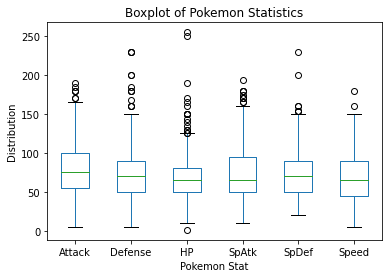

In [52]:
fig = plt.figure(figsize=(10,15))
# I looked up how to filter out columns for boxplots and found this at https://stackoverflow.com/questions/13003051/how-do-i-exclude-a-few-columns-from-a-dataframe-plot
exclude = ['Num', 'Name',  'Total', 'Generation', 'Legendary']
info.loc[:, info.columns.difference(exclude)].plot.box()
plt.ylabel("Distribution")
plt.xlabel("Pokemon Stat")
plt.title("Boxplot of Pokemon Statistics"); 

6B - The features have different ranges, therefore we should scale the data before considering the clustering analysis. Scale the data using min-max normalization with range of [0, 1].

In [53]:
exclude = ['Num', 'Name', 'Total', 'Type1', 'Type2', 'Generation', 'Legendary']
y = MinMaxScaler()
info.loc[:, info.columns.difference(exclude)] = y.fit_transform(info.loc[:, info.columns.difference(exclude)])

6C - Run Kmeans clustering on the data of b with k = [2, 3, ..., 8]

In [54]:
kmtrace = []
for i in range(2, 9):
  km = cluster.KMeans(n_clusters=i)
  km.fit(info.loc[:, info.columns.difference(exclude)])
  kmtrace.append(km)

6D - Determine the "best" number of clusters using gap statistic

In [55]:
# utilized source at https://github.com/jmmaloney3/gapstat/blob/master/notebooks/GapStatClustering.ipynb to determine this
gstat_ac = GapStatClustering(max_k=8).fit(info.loc[:, info.columns.difference(exclude)])
num = gstat_ac.n_clusters_
print(num)

5


6E - Report the mean skill values (centers) of each group, best number of groups determined in (d), as a table/data frame

In [56]:
km = cluster.KMeans(n_clusters=num)
km.fit(info.loc[:, info.columns.difference(exclude)])
km.cluster_centers_
df2 = pd.DataFrame(km.cluster_centers_, columns=['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'])
print(df2)


         HP    Attack   Defense     SpAtk     SpDef     Speed
0  0.566944  0.427863  0.311387  0.269523  0.253443  0.324747
1  0.624046  0.380228  0.348701  0.621445  0.362483  0.539706
2  0.261892  0.209032  0.201631  0.201262  0.140085  0.251286
3  0.403934  0.260450  0.271928  0.388793  0.246775  0.526184
4  0.339027  0.390293  0.302205  0.430522  0.382210  0.286446


6F - Report the mean skill values (center) of each group, best number of groups determined in (d) as a table/data frame using original data scaling (reverse the scaling back to the original data range)

In [57]:
km3 = cluster.KMeans(n_clusters=num)
km3.fit(info2.loc[:, info.columns.difference(exclude)])
km3.cluster_centers_
df = pd.DataFrame(km3.cluster_centers_, columns=['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'])
print(df)

           HP      Attack    Defense       SpAtk      SpDef       Speed
0  120.925926   92.879630  89.509259  123.111111  97.861111  100.287037
1   53.753623   51.550725  49.887681   47.322464  48.858696   49.605072
2   96.064706   69.276471  74.670588   69.070588  68.294118   88.835294
3   67.606250   74.512500  83.037500   92.993750  89.700000   67.343750
4   94.848837  129.255814  69.662791   61.372093  87.279070   49.104651


6G - Create a single figure with a radar plot showing the mean skill values (Center) for each cluster group, set from (d)

In [58]:
for i in range(0, num):
  Cluster = pd.DataFrame([df2.iloc[i, 0:6].values], columns=(['HP','Attack','Defense','SpAtk', 'SpDef', 'Speed']))
  my_title = "Cluster " + str(i+1)
  fig = px.line_polar(Cluster, r=Cluster.iloc[0, 0:6], theta=['HP','Attack','Defense','SpAtk', 'SpDef', 'Speed'], line_close=True, title=my_title)
  fig.show()
print("NOTICE: The graph does not appear in the PDF. Please see the end of the PDF to see the radar plots that were generated. You can also run the .ipynb notebook to see them.")

NOTICE: The graph does not appear in the PDF. Please see the end of the PDF to see the radar plots that were generated. You can also run the .ipynb notebook to see them.


## Problem 7

In [59]:
# Import the data
df = pd.read_csv("music2.csv",
                   engine='python')

df.head()

,Song,Artist,Type,LVar,LAve,LMax,LFEner,LFreq
0,Dancing Queen,Abba,Rock,17600755.6,-90.006867,29921,105.92095,59.57379
1,Knowing Me,Abba,Rock,9543020.9,-75.766719,27626,102.83616,58.48031
2,Take a Chance,Abba,Rock,9049481.5,-98.062924,26372,102.32488,124.59397
3,Mamma Mia,Abba,Rock,7557437.3,-90.471062,28898,101.61648,48.76513
4,Lay All You,Abba,Rock,6282285.6,-88.952631,27940,100.30076,74.02039


Standardize the numeric variables

In [60]:
# SOURCE for Standardization: https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing
x = df['LVar']
stats.zscore(x)
col_names = ['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']

shrunk_df = df[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']].copy()

s_scaler = preprocessing.StandardScaler()
standardized_df = s_scaler.fit_transform(shrunk_df)

standardized_df = pd.DataFrame(standardized_df, columns=col_names)

Perform hierarchial clustering two times, with single and complete linkage. Label the clusters by type, and then by artist

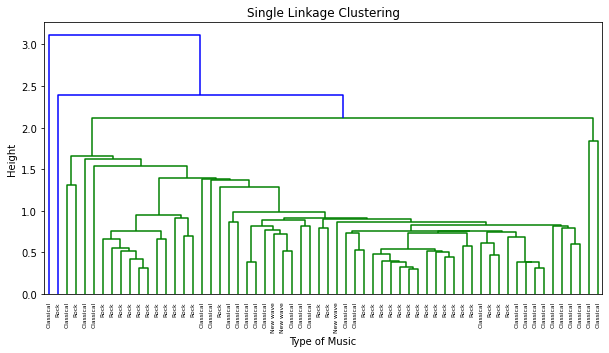

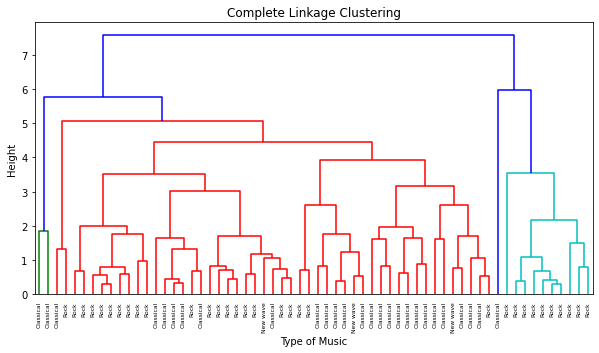

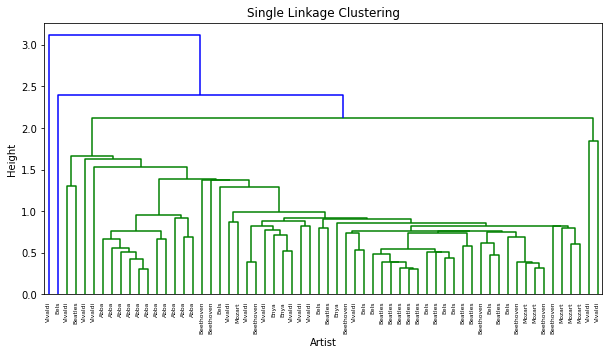

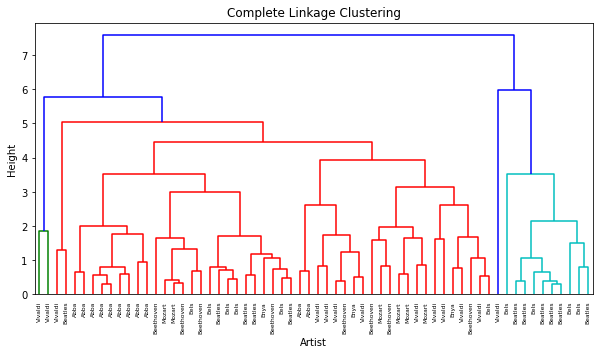

In [61]:
types_list = df['Type'].to_list()
artists_list = df['Artist'].to_list()

# single linking 'Type' of music
Z = hierarchy.linkage(standardized_df, 'single')
plt.figure(figsize=(10, 5))
plt.title('Single Linkage Clustering')
plt.xlabel('Type of Music')
plt.ylabel('Height')
dn = hierarchy.dendrogram(Z, labels=types_list)

# complete linking 'Type' of music
Z = hierarchy.linkage(standardized_df, 'complete')
plt.figure(figsize=(10, 5))
plt.title('Complete Linkage Clustering')
plt.xlabel('Type of Music')
plt.ylabel('Height')
dn = hierarchy.dendrogram(Z, labels= types_list)

# single linking with Artist labels
Z = hierarchy.linkage(standardized_df, 'single')
plt.figure(figsize=(10, 5))
plt.title('Single Linkage Clustering')
plt.xlabel('Artist')
plt.ylabel('Height')
dn = hierarchy.dendrogram(Z, labels=artists_list)

# complete linking Arist Lables
Z = hierarchy.linkage(standardized_df, 'complete')
plt.figure(figsize=(10, 5))
plt.title('Complete Linkage Clustering')
plt.xlabel('Artist')
plt.ylabel('Height')
dn = hierarchy.dendrogram(Z, labels=artists_list)

Which method seems best?

In our opinion, the best method based on the dataset that was provided appears to be the ones that utilize complete linkage. The dendrograms that utilize single linkage appear to have a lot of crowding that makes parsing and interpretting the data more difficult.

